## Ejercicios API Frankfurter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import requests

from pprint import pprint

### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

In [82]:
def frank_querys(year, second_currency = None, currency = 'EUR' , currencys:list = [], plot:bool = False ):
    if second_currency == None and currencys == []:
        print('No currency to exchange')
        
        return None
    
    url = "https://api.frankfurter.app"

    date = f"{year}-01-01"
    
    if len(currencys) >0:
        df = pd.DataFrame()
        for c in currencys:
            endpoint = f"{url}/{date}..?from={currency}&to={c}"

            print(f"Endpoint: {endpoint}")

            response = requests.get(endpoint)
            
            data = response.json()
            dates = [d for d in data["rates"].keys()]
            dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
            to_currency = [data["rates"][date][c] for date in data["rates"].keys()]
            
            temp_df = pd.DataFrame()
            temp_df['date'] = dates
            temp_df[f'{c}'] = to_currency
            
            if 'date' in df.columns:
                df = df.merge(temp_df, on = 'date' )
            else:
                df = temp_df
        if plot:
            for c in df.columns[1:]:
                plt.figure(figsize = (18, 10))
                max_value = (df[df[f'{c}'] == df[f'{c}'].max()]['date'], df[df[f'{c}'] == df[f'{c}'].max()][f'{c}'].values )
                min_value = (df[df[f'{c}'] == df[f'{c}'].min()]['date'], df[df[f'{c}'] == df[f'{c}'].min()][f'{c}'].values )
                plt.plot_date(x = df.date, y = df[f'{c}'], fmt = "--")

                # max
                plt.plot(max_value[0],
                         max_value[1],
                         color      = "green",
                         marker     = "o",
                         markersize = 10,
                         label      = f"max: {max_value[1][0]}")

                # min
                plt.plot(min_value[0],
                         min_value[1],
                         color      = "red",
                         marker     = "o",
                         markersize = 10,
                         label      = f"min: {min_value[1][0]}")

                # Evita que se sobrepongan las fechas
                plt.gcf().autofmt_xdate()

                # Etiquetas
                plt.legend()
                plt.xlabel("Dates", fontsize = 20)
                plt.ylabel(f"{c}", fontsize = 20)
                plt.title(f"Exchange {currency} - {c} in {year}", fontsize = 20)


                plt.grid()
                plt.show()
                
            
    else:
        endpoint = f"{url}/{date}..?from={currency}&to={second_currency}"

        print(f"Endpoint: {endpoint}")

        response = requests.get(endpoint)
        
        data = response.json()
        dates = [d for d in data["rates"].keys()]
        dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
        to_currency = [data["rates"][date][second_currency] for date in data["rates"].keys()]
        df = pd.DataFrame()
        df['date'] = dates
        df[f'{second_currency}'] = to_currency
        
        if plot:
            plt.figure(figsize = (18, 10))
            max_value = (df[df[f'{second_currency}'] == df[f'{second_currency}'].max()]['date'], df[df[f'{second_currency}'] == df[f'{second_currency}'].max()][f'{second_currency}'].values )
            min_value = (df[df[f'{second_currency}'] == df[f'{second_currency}'].min()]['date'], df[df[f'{second_currency}'] == df[f'{second_currency}'].min()][f'{second_currency}'].values )
            plt.plot_date(x = df.date, y = df[f'{second_currency}'], fmt = "--")

            # max
            plt.plot(max_value[0],
                     max_value[1],
                     color      = "green",
                     marker     = "o",
                     markersize = 10,
                     label      = f"max: {max_value[1][0]}")

            # min
            plt.plot(min_value[0],
                     min_value[1],
                     color      = "red",
                     marker     = "o",
                     markersize = 10,
                     label      = f"min: {min_value[1][0]}")

            # Evita que se sobrepongan las fechas
            plt.gcf().autofmt_xdate()

            # Etiquetas
            plt.legend()
            plt.xlabel("Dates", fontsize = 20)
            plt.ylabel(f"{currency}", fontsize = 20)
            plt.title(f"Exchange {currency} - {second_currency} in {year}", fontsize = 20)


            plt.grid()
            plt.show()
            
    return df
    

Endpoint: https://api.frankfurter.app/2023-01-01..?from=EUR&to=USD


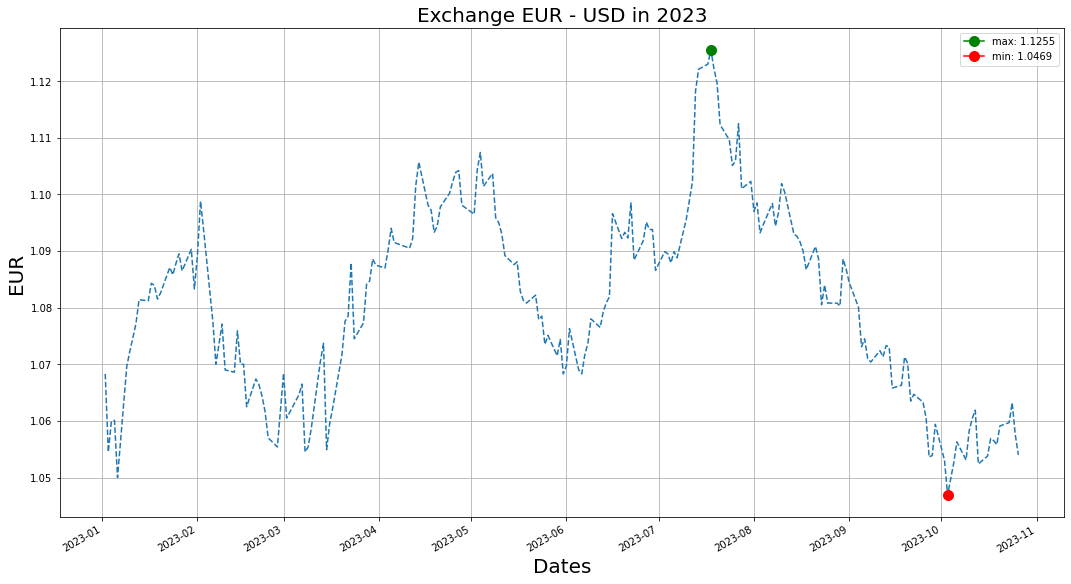

,date,USD
0,2023-01-02,1.0683
1,2023-01-03,1.0545
2,2023-01-04,1.0599
3,2023-01-05,1.0601
4,2023-01-06,1.0500
...,...,...
206,2023-10-20,1.0591
207,2023-10-23,1.0597
208,2023-10-24,1.0632
209,2023-10-25,1.0576


In [83]:
frank_querys(2023, 'USD', plot=True)

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

Endpoint: https://api.frankfurter.app/2023-01-01..?from=EUR&to=USD
Endpoint: https://api.frankfurter.app/2023-01-01..?from=EUR&to=AUD
Endpoint: https://api.frankfurter.app/2023-01-01..?from=EUR&to=GBP
Endpoint: https://api.frankfurter.app/2023-01-01..?from=EUR&to=CHF


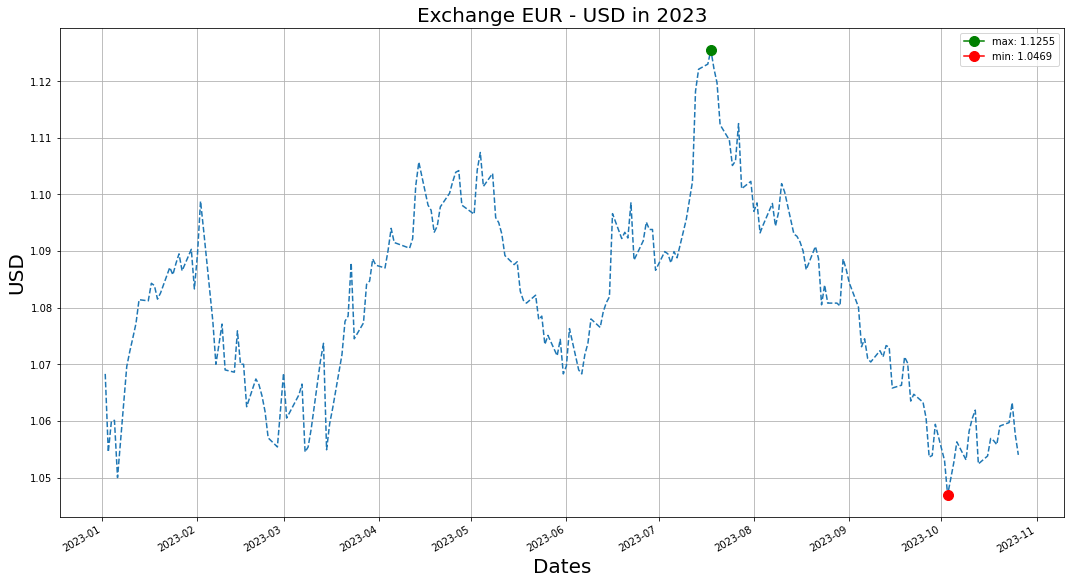

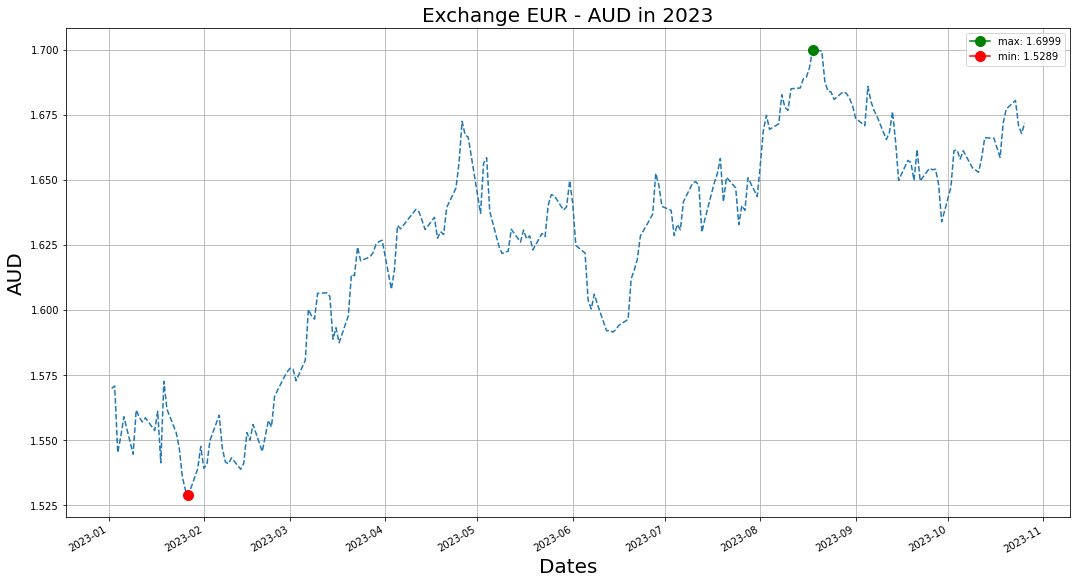

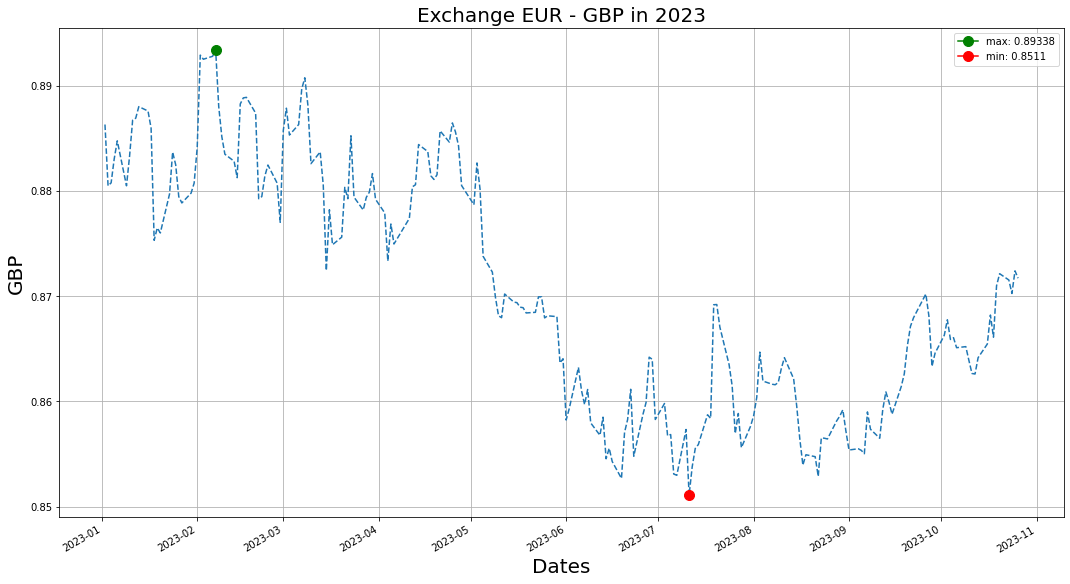

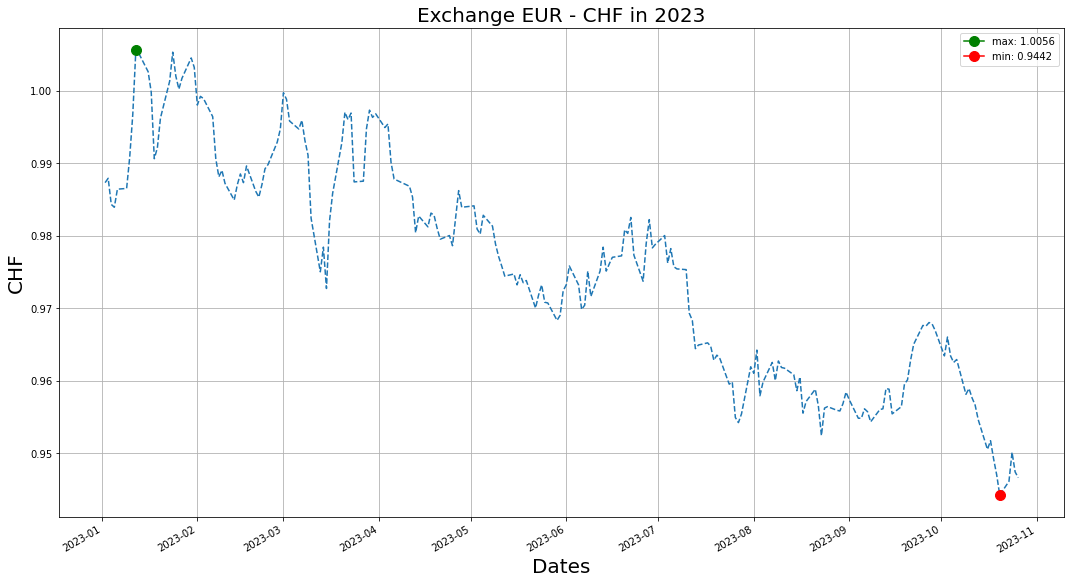

,date,USD,AUD,GBP,CHF
0,2023-01-02,1.0683,1.5699,0.88630,0.9873
1,2023-01-03,1.0545,1.5708,0.88048,0.9879
2,2023-01-04,1.0599,1.5452,0.88076,0.9843
3,2023-01-05,1.0601,1.5515,0.88303,0.9839
4,2023-01-06,1.0500,1.5590,0.88475,0.9864
...,...,...,...,...,...
206,2023-10-20,1.0591,1.6772,0.87213,0.9442
207,2023-10-23,1.0597,1.6805,0.87153,0.9461
208,2023-10-24,1.0632,1.6708,0.87025,0.9501
209,2023-10-25,1.0576,1.6678,0.87240,0.9474


In [84]:
frank_querys(2023, currencys=['USD', 'AUD', 'GBP' ,'CHF'], plot=True)

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.

Endpoint: https://api.frankfurter.app/2023-01-01..?from=GBP&to=CHF


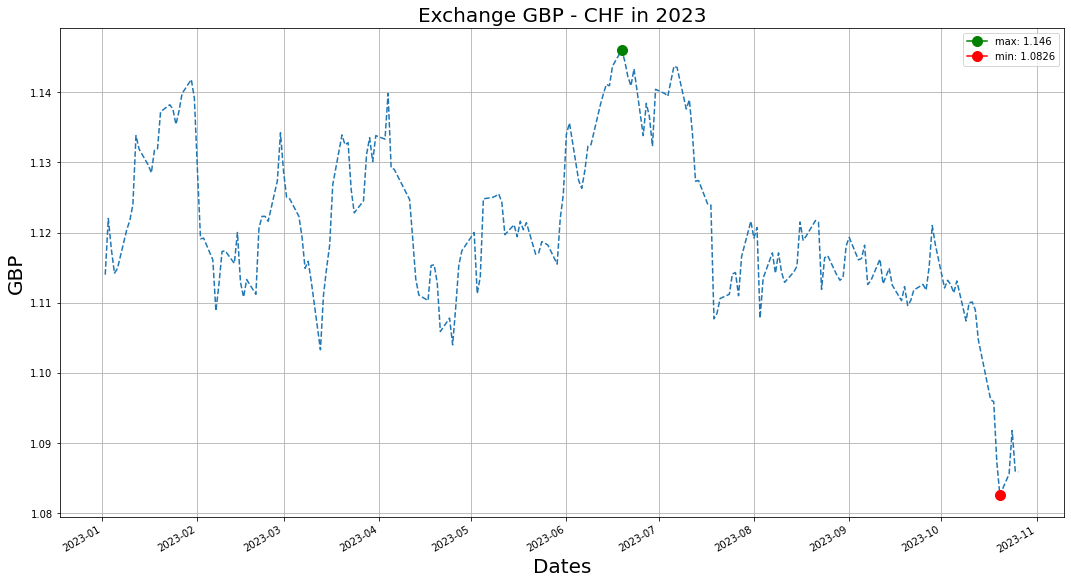

,date,CHF
0,2023-01-02,1.1140
1,2023-01-03,1.1220
2,2023-01-04,1.1176
3,2023-01-05,1.1142
4,2023-01-06,1.1149
...,...,...
206,2023-10-20,1.0826
207,2023-10-23,1.0856
208,2023-10-24,1.0918
209,2023-10-25,1.0860


In [85]:
frank_querys(2023, second_currency= 'CHF',currency='GBP',currencys=[], plot=True)